In [3]:
#Import packages to be used
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from IPython.display import display

# Intro

Hello my name is Anthony Rosamond and in this project I am going to be looking at a dataset containing information on cars along with their fuel efficiency. The goal here is to create a model using multiple linear regression in order to predict the fuel efficiency (in mpg) from the variables weight, engine displacement, and engine power. 

Let's talk about what exactly multiple regression is and how it is used. Multiple regression is an extension of simple linear regression. If you aren't familiar with simple linear regression it is taking one variable and using it to predict the value of another using an equation of the form $y = \beta_0 + \beta_1x + \varepsilon$. Here $\beta_0$ is simply the y-intercept of the model, $y$ is the variable being predicted, $x$ is the variable used to predict and $\beta_1$ tells us how much a change in $x$ will affect our predicted value. 

Multiple regression is an extension of this where instead of only 1 variable being used to predict $y$ we have multiple variables. This is going to create a model with an equation of the form $y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \varepsilon$. Here you can see we accomadate the usage of more variables.

Now let's first start with imporoting the dataset and creating a pandas dataframe with it. Here we also print the dimensions of the dataframe to make sure it is consistent with the csv file.


In [4]:
#Load in csv file containing data into a data frame
df = pd.read_csv("auto-mpg 2.csv")
#Check to make sure we have a data frame with the dimensions it shoul have
print(df.shape)
#Peek at the first few rows
display(df.head(5))

#Get a summary of statistics of the data frame.
display(df.describe())

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


#### Data Cleaning

As we can see above, there are a total of 9 different variables in this dataset, some of which are discrete and a couple of others that aren't very useful for what I am trying to do here. So, next I am going to remove the columns that I won't be using and I will also make sure that there aren't any nan or null values within the dataset.

In [5]:
#Drop the columns that aren't going to be used
df = df.drop(['cylinders', 'acceleration', 'model year', 'origin', 'car name'], axis = 1)

#Check to make sure we have only the variables we need
df.head(5)

,mpg,displacement,horsepower,weight
0,18.0,307.0,130,3504
1,15.0,350.0,165,3693
2,18.0,318.0,150,3436
3,16.0,304.0,150,3433
4,17.0,302.0,140,3449


In [29]:
#Check for null values
print(df.isnull().sum())

mpg             0
displacement    0
horsepower      0
weight          0
dtype: int64


#### Visualizing The Variables

Now that we have confirmation that this is a complete dataset and we have removed all unnecessary variables, let's take a look at some plots to get a general idea of how these variables relate to each other. First we will look at a plot of mpg vs weight. Then we are going to look at the mpg vs engine displacement (size), and finally the mpg vs the engine power.

Text(0.5, 1.0, 'Car MPG vs Weight')

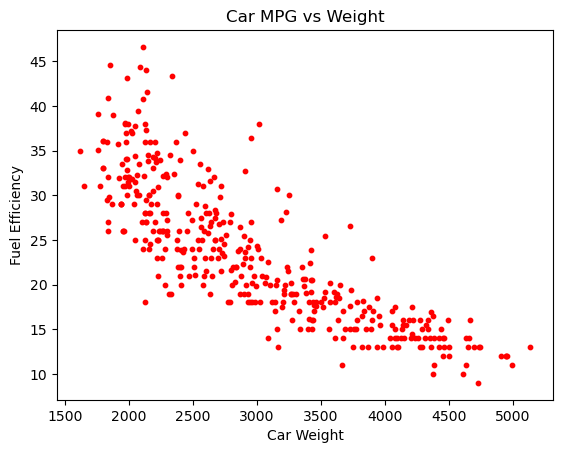

In [36]:
#Create the plot
plt.scatter(df['weight'], df['mpg'], color = 'red', s = 10)

#Add titles to axes and plot
plt.xlabel('Car Weight')
plt.ylabel('Fuel Efficiency')
plt.title('Car MPG vs Weight')

Text(0.5, 1.0, 'Car MPG vs Engine Displacement')

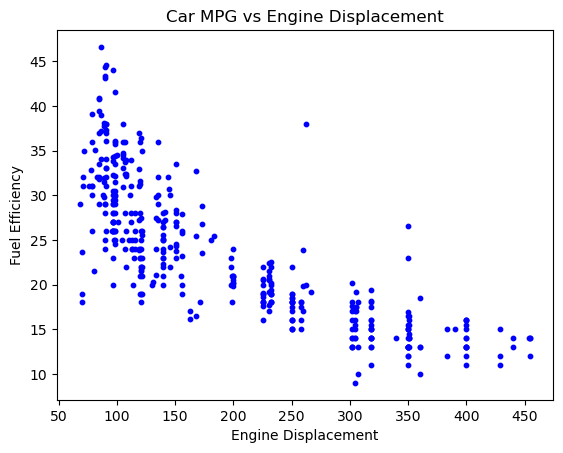

In [6]:
#Create the plot
plt.scatter(df['displacement'], df['mpg'], color = 'blue', s = 10)

#Add titles to axes and plot
plt.xlabel('Engine Displacement')
plt.ylabel('Fuel Efficiency')
plt.title('Car MPG vs Engine Displacement')

Text(0.5, 1.0, 'Car MPG vs Engine Power')

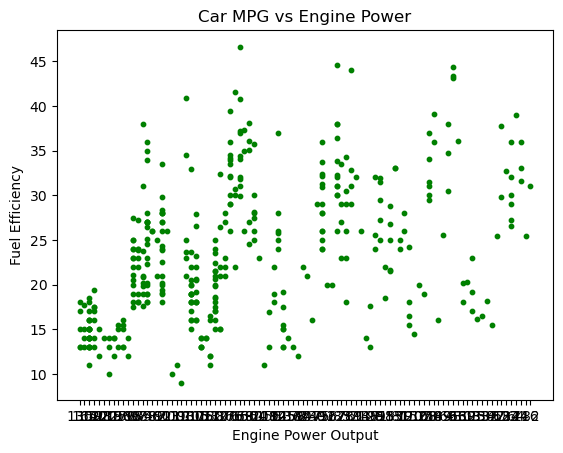

In [39]:
#Create the plot
plt.scatter(df['horsepower'], df['mpg'], color = 'green', s = 10)

#Add titles to axes and plot
plt.xlabel('Engine Power Output')
plt.ylabel('Fuel Efficiency')
plt.title('Car MPG vs Engine Power')

#### Building The Model

Now that we have our plots we can get an idea of how these variables affect fuel efficiency. You can see on the plots showing the mpg vs weight and displacement that there are obvious downward trends for those variables. However, when we look at our plot for mpg vs engine power, it is completely all over the place. In matter of fact there is a clump of low power values literally comprise of the highest density of lower efficiency cars. Given the results here I am going to scrap the engine power variable from the model as it would just completely throw it off. 

Now let's get to building this model! If you remember from above I imported a couple packages from sklearn. That is the scikit-learn package which contains a lot of neat stuff for machine learning models and hence we will be using it to build the multiple regression model.

In order to perform this regression we are going to split up the dataset into two subsets. One will be the training subset and the other will be the testing subset. We will train the model with the training set and then test it on the test set. This separation is important as we need to use data to train the model but in order to really see how accurate it is we have to test it on data that the model hasn't seen before. Let's do this!

In [44]:
#Separate the variables from the prediction variable
X = df[['weight', 'displacement']]
y = df['mpg']

#Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 5)

#Create and then train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Okay now we have created out model and trained it with the training data! Now it is time to test it out and then calculate some parameters to see how well the model fits. For that we are going to look at a value that is known as the mean squared error (or MSE). The underlying math here is you calculate the error for all the data points (that is how far away is the point from the regression line), square them and then average them. The smaller this number is the better the model is at predicting the values.

In order to get this we are going to generate a list of prediction values based on the test dataset and then compare that to the actual values to get our MSE.

In [48]:
#Calculate the predicted mpg values for the test set
y_pred = model.predict(X_test)

#Calculate the mean squared error of the value and display that value
print(mean_squared_error(y_test, y_pred))

24.934412155787335


#### Modifying The Model

In an ideal world the value displayed above would be as close to 0 as possible! A value of roughly 25 is not that great. This result makes sense when you go back and take a look at those scatter plots. They don't decrease in what I would call a linear fashion and honestly they more resemble a line in the form $y = \frac{1}{x}$. Let's see if we can make some changes to the model in order to lower our MSE.

We are going to transform our X parameters into the form $\frac{1}{X}$ and then see how the model performs under that transformation.

In [53]:
#Transform our parameters
X_train2 = 1/X_train
X_test2 = 1/X_test

#Create and then train the updated regression model
model = LinearRegression()
model.fit(X_train2, y_train)

#Calculate the predicted mpg values for the test set
y_pred2 = model.predict(X_test2)

#Calculate the updated mean squared error of the value and display that value
print(mean_squared_error(y_test, y_pred2))

23.354057988704472


#### Other Factors

Okay so this updated value is slightly lower than the previous one. Not by much but we were still able to create a slightly more accurate model (honestly it's more like a less inaccurate model). But why is it still so high? The main reason for this has to do with the spread of the data. When you look at the scatter plots for weight and displacement, we see that for a small range of X, we get a large range of y. This fact is going to make any model very tough to be accurate. This phenomenon we are seeing can be explained by a couple of reasons. One big one is this model can't differentiate between the car's different makes and models. An engine from company A can be more efficient than Company B even if the cars weigh the same, the engines are the same size, and they produce the same power. Another factor here could be the model year variation of the cars. Looking back at the summary statistics we see a range in model year from 1970 to 1982 and engines tend to get more efficient over time so this could skew that data.

Given that these models aren't all that reliable and that I have given possible explanations for them not working so well, let's do some statistical calculations to see if we can find any patterns. First we're going to load in the original dataset again and then take a look at the first few rows again (mainly for my convenience). Then we will first look at the average mpg for each unique cylinder value.


In [61]:
#Bring back the original dataset so we can look a little closer at the discrete variables ommitted from the regression model.
df = pd.read_csv("auto-mpg 2.csv")

#Re-examine the original dataset
display(df.head(5))

#Calculate and then print the averages
avg_cyl = df.groupby('cylinders')['mpg'].mean()
print(avg_cyl)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


cylinders
3    20.550000
4    29.286765
5    27.366667
6    19.985714
8    14.963107
Name: mpg, dtype: float64


Okay so we can now see here that there is an obvious correlation between the amount of cylinders in an engine and the mpg. Now the 3 cylinder cars are a bit of an outlier here but the other values make perfect sense. This data wouldn't be able to be shows in a linear regression since the cylinder variable is discrete and not continuous (meaning it can only take on a finite amount of values). Now let's do the same calculation but with model year instead of cylinders.

In [62]:
#Same calculation as above but with model year instead.
avg_year = df.groupby('model year')['mpg'].mean()
print(avg_year)

model year
70    17.689655
71    21.250000
72    18.714286
73    17.100000
74    22.703704
75    20.266667
76    21.573529
77    23.375000
78    24.061111
79    25.093103
80    33.696552
81    30.334483
82    31.709677
Name: mpg, dtype: float64


Here we see some more data that makes a lot of sense once again. The average mpg per model year is seeing an upward trend with a massive spike between 1979 and 1980. So why is there such a dramatic jump in efficiency here? For those who paid attention in history class the world was in an oil crisis at this time. The price of crude oil more than doubled in 1979 and the average cost of gas almost doubled between 1978 and 1980. There was a huge incentive for cars produced after 1979 to be as efficient as possible as that would be a very important metric for the customer. 

Just to be safe though, let's look at a histogram to see how many cars in the set are from these years.

Text(0.5, 1.0, 'Number of Cars per Model Year')

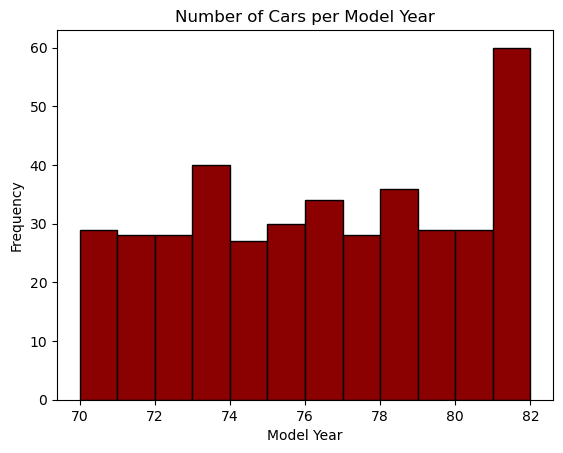

In [71]:
plt.hist(df['model year'], bins = 12, color = '#8B0000', edgecolor = 'black')

plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.title('Number of Cars per Model Year')

Alright so there is a relatively even distribution (with the exception of a spike for 1982) in the number of entries per model year in this data set. This shows that there isn't a year with only a few datasets where an average would be skewed by 1 or 2 values. Now let's do the same but with the engine cylinders.

Text(0.5, 1.0, 'Number of Cars per Number of Cylinders')

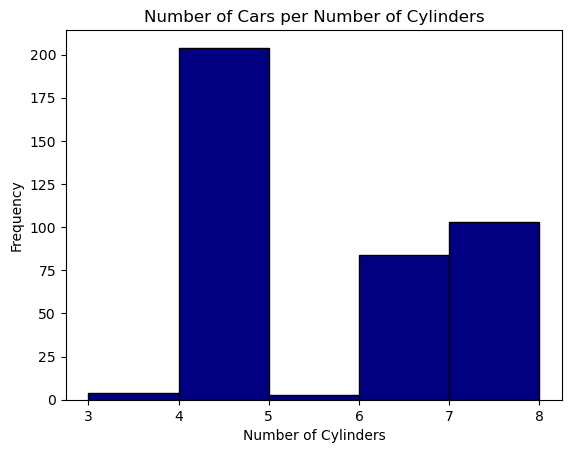

In [72]:
plt.hist(df['cylinders'], bins = 5, color = '#000080', edgecolor = 'black')

plt.xlabel('Number of Cylinders')
plt.ylabel('Frequency')
plt.title('Number of Cars per Number of Cylinders')

Okay here again we see data that more or less makes sense. Obviously 4-cylinder cars are the most common ones. Notice how 3 and 5-cylinder cars barely register on the graph. Those are very rare engine configurations and hardly any production car uses those types of engines.

These charts don't show any irregularities that would've skewed the data in favor of what we have been observing here and now it is time to make some conclusions about what we discovered.

## Conclusion
We were able to gather a couple of things from the data. While our goal was to create a multiple regression model that could accurately predict a car's mpg based on the weight and the engine displacement, the model ended up not being so accurate. However, that doesn't mean there isn't a correlation. The scatter plots showed an obvious downward trend in mpg as the car got heavier and as the engine got larger. However, there were other factors at play that had an affect on the efficacy of the model. Due to the fact that the dataset spans the years 1970-1982, we were able to see that the cars from each year would, on average, become more fuel efficient. This means that the model year itself is a variable that contributes a good amount to fuel efficiency. We also saw an outlier in these calculations with a huge jump in mpg with 1980 models and we can safely assume that the geopolitical issues facing the world at the time (mainly the 1979 Oil Crisis) 

We also saw that as the number of cylinders went up, the mpg went down. This was especially true for the jumps from 4 to 6 and 6 to 8 cylinders. We had an outlier group with the 3-cylinder class being the second least efficient but out histogram for the number of cylinders shows that there a negligible amount of them (along with 5-cylinder). 

Overall while there are clear and obvious factors that influence a car's mpg, accounting for every one of them in a single model isn't feasible and for an analysis such as this one you are much better off observing visual charts and looking at statistical metrics in order to come to conclusions instead of trying to get a model to accurately fit the data.
